# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №4

Задание выполнил(а): Скворцов Иван

### Общая информация

__Дата выдачи:__ 24.05.2020

__Дедлайн:__ 23:59 07.06.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 19)  \times 10 / 19,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 19, а максимальное число дополнительных баллов, которые пойдут в бонус — 1.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 

## Random Forest своими руками (4 балла)

Реализуйте алгоритм случайного леса. В соответствии с построением алгоритма, ваша реализация должна сочетать в себе метод бэггинга и метод случайных подмножеств. Также она должна работать для двух типов задач: как для задачи регрессии, так и для задачи классификации.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn`.*

In [7]:
from scipy import stats # штука для подсчета итогов голосования

class RandomForest:
    def __init__(self, n_estimators, max_depth, max_features='sqrt', task_type='regression'):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        max_features - maximum features for each split in DecisionTree from sklearn
        task_type - 'regression' or 'classification'
        """

        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.task_type = task_type
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """


        self.X = X_train
        self.y = y_train

        observations = self.X.shape[0]

        self.estimators = []

        if self.task_type == 'regression':

            for _ in range(self.n_estimators):

                self.algorithm = DecisionTreeRegressor(splitter = 'best',
                max_depth = self.max_depth, max_features = self.max_features)
        
                i = np.random.choice(observations, observations) # формируем выборку исходной длины с возвращением
                sample_X = self.X[i]
                sample_y = self.y[i]
                tree = self.algorithm.fit(sample_X, sample_y)
                self.estimators.append(tree)

        elif self.task_type == 'classification':
            
            for _ in range(self.n_estimators):

                self.algorithm = DecisionTreeClassifier(splitter = 'best', 
                max_depth = self.max_depth, max_features = self.max_features)
                
                i = np.random.choice(observations, observations) # формируем выборку исходной длины с возвращением
                sample_X = self.X[i]
                sample_y = self.y[i]
                
                tree = self.algorithm.fit(sample_X, sample_y)
                self.estimators.append(tree)


        self.estimators = np.array(self.estimators)
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        self.X_test = X_test
        self.predictions = []

        for estimator in self.estimators:
            self.predictions.append(estimator.predict(self.X_test))

        self.predictions = np.array(self.predictions)

        if self.task_type == 'regression':
            y_pred = np.mean(self.predictions, axis = 0)
        else:
            y_pred = stats.mode(self.predictions, axis = 0).mode[0]

        return y_pred

Проверьте вашу реализацию на задаче регрессии. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10.25 **(не меняйте параметры сида)**.

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [16]:
np.random.seed(19052019)

forest = RandomForest(n_estimators = 1000, max_depth = None, max_features=0.325, task_type='regression')
forest.fit(X_train, y_train)
mean_squared_error(y_test, forest.predict(X_test))

9.724249536063093

Проверьте вашу реализацию на задаче классификации. Подберите оптимальные гиперпараметры, чтобы получить accuracy > 0.83 **(не меняйте параметры сида)**.

In [17]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [18]:
np.random.seed(19052019)

forest = RandomForest(n_estimators = 1000, max_depth = None, max_features='sqrt', task_type='classification')

forest.fit(X_train, y_train)
print('Accuracy for custom Random Forest: {}'.format(accuracy_score(y_test, forest.predict(X_test))))

Accuracy for custom Random Forest: 0.9440559440559441


## Градиентный бустинг своими руками (5 + 1* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Однако чтобы получить дополнительный 1 балл вам нужно реализовать нахождение оптимального $\gamma_N$ на каждом шаге.

В качестве функции потерь возьмите MSE.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

Известно, что при применении градиентного бустинга с MSE задача базовой модели &mdash; **подогнать ответы под ошибку предыдущих.**

In [360]:
# это может помочь вам для поиска оптимальных gamma

from scipy.optimize import minimize

In [480]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """

        tree = DecisionTreeRegressor(max_depth = self.max_depth)
        self.trees = [tree.fit(X_train, y_train), ]

        for i in range(self.n_estimators - 1):

            tree = DecisionTreeRegressor(max_depth = self.max_depth)
            #weights = np.concatenate((np.ones(len(self.trees) - 1), [self.learning_rate]))
            #error = y_train - weights @ np.array([tree.predict(X_train) for tree in self.trees])
            error = y_train - (self.learning_rate * np.ones(len(self.trees)) @ np.array([tree.predict(X_train) for tree in self.trees]))

            tree = tree.fit(X_train, error)
            self.trees.append(tree)


        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = (self.learning_rate * np.ones(len(self.trees))) @ np.array([tree.predict(X_test) for tree in self.trees])

        return y_pred

In [487]:
def gamma_mse(gamma : list, trees, X_train, y_train, gammas, learning_rate):
    weights = np.concatenate((gammas * learning_rate, [gamma[0]]))
    return mean_squared_error(y_train, weights @ np.array([tree.predict(X_train) for tree in trees]))

In [501]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """

        tree = DecisionTreeRegressor(max_depth = self.max_depth)
        self.trees = [tree.fit(X_train, y_train), ]
        self.gammas = []

        for i in range(self.n_estimators - 1):

            gamma = minimize(gamma_mse, x0 = 0.1, args = (self.trees, X_train, y_train, np.array(self.gammas), self.learning_rate))['x'][0]
            self.gammas.append(gamma)

            error = y_train - (self.learning_rate * np.array(self.gammas)) @ np.array([tree.predict(X_train) for tree in self.trees])

            tree = DecisionTreeRegressor(max_depth = self.max_depth)
            tree = tree.fit(X_train, error)

            self.trees.append(tree)

        gamma = minimize(gamma_mse, x0 = 1.0, args = (self.trees, X_train, y_train, np.array(self.gammas), self.learning_rate))['x'][0]
        self.gammas.append(gamma)


        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        y_pred = (self.learning_rate * np.array(self.gammas)) @ np.array([tree.predict(X_test) for tree in self.trees])

        return y_pred

Проверьте вашу реализацию. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10 как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**.

In [502]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [503]:
gb = GradientBoosting(n_estimators = 40, max_depth = 6, learning_rate = 0.2)

In [504]:
np.random.seed(19052019)
gb.fit(X_train, y_train)

In [505]:
gb.gammas

[0.9999999917694424,
 0.9999999933780572,
 0.9999999927851362,
 0.9999999923845836,
 0.9999999921146678,
 0.9999999933324882,
 0.9999999930229384,
 0.9999999921335857,
 0.9999999928963323,
 0.9999999921654407,
 0.999999992413599,
 0.9999999916159642,
 0.9999999932599183,
 0.9999999894853164,
 0.9999999919309251,
 0.9999999948278246,
 0.999999992753434,
 0.9999999867441828,
 0.9999999897319488,
 0.9999999855470898,
 0.9999999753615685,
 0.9999999281924423,
 1.0000000672252263,
 0.9999999089128835,
 1.0000002684058336,
 1.0000000965418103,
 0.9999997644156462,
 1.0000000580542028,
 1.0000006439414761,
 0.9999998735479995,
 0.9999999792275581,
 0.9999999756787036,
 1.0000001363325053,
 0.9999994743982865,
 1.0000000242075344,
 0.9999999830788789,
 0.9999999561435253,
 1.0000000786609688,
 0.9999999296178539,
 1.0]

In [506]:
mean_squared_error(y_test, gb.predict(X_test))

9.569876075570667

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да

## Ансамблевые методы (10 баллов)

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
plt.style.use('ggplot')
mpl.rcParams['axes.titlesize'] = 17
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [4]:
data = pd.read_csv('./diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

Посмотрим на признаки и их статистики:

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Очевидно, что нули имеют смысл в случае переменной `Pregnancies` (беременности) и `Outcome` (дамми на диабет), так что обрабатывать их не будем. В случаях с `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` и `BMI` нули отвечают за пропуски, поскольку область значений этих переменных обычно не включает ноль (это можно увидеть и на гистограммах ниже). В переменной `Age` нет нулей (min = 21), а `DiabetesPedigreeFunction` может принимать нулевые значения, поскольку отвечает за степень предрасположенности к диабету.

Задаем список переменных, с которыми будем разбираться:

In [7]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Заменим нули в этих столбцах на `np.nan`:

In [8]:
data[cols] = data[cols].replace({0:np.nan})

Проверим, что все прошло успешно:

In [9]:
data.info() # урааа...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Теперь со спокойной душой можно заполнить пропуски средним. Однако делать это будем не у всех переменных, а только у тех, где количество пропусков невелико; в обратном случае честно признаем, что данных нет.

Пропусков не очень много в столбцах `Glucose`, `BloodPressure` и `BMI`.

In [10]:
cols =  ['Glucose', 'BloodPressure', 'BMI']

data[cols] = data[cols].fillna(data[cols].mean())

Сделано!

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

Эта задача слишком проста для студента ИАДа...

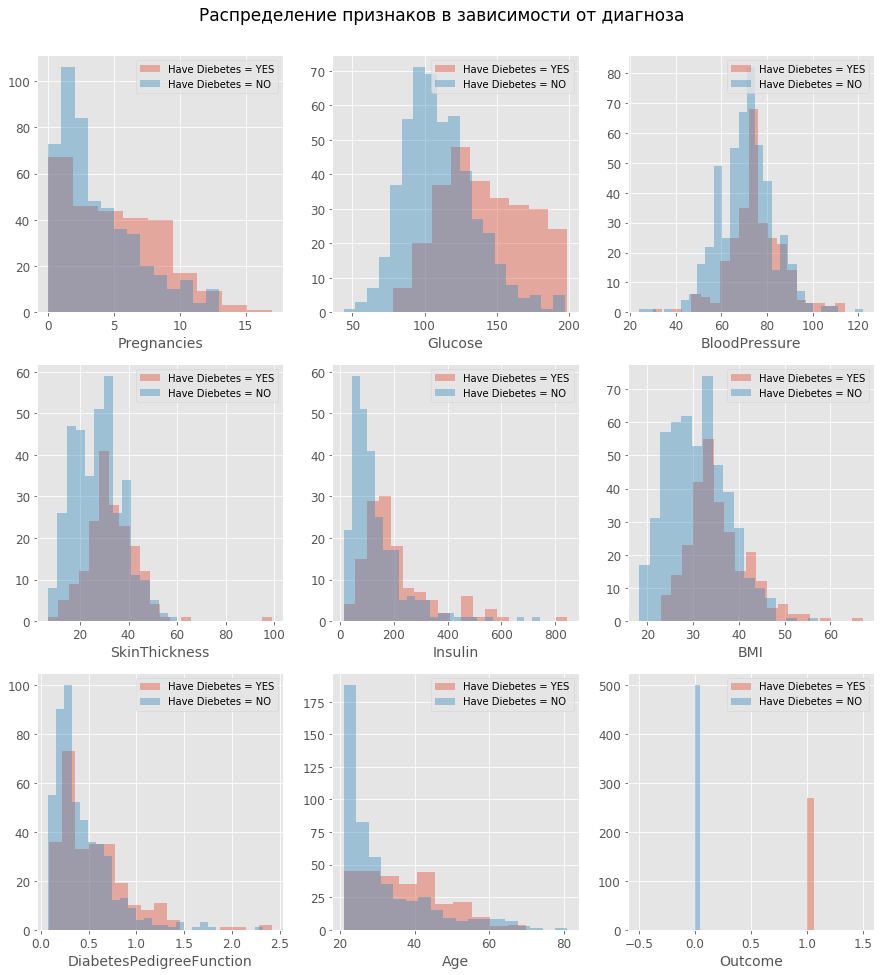

In [11]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
plt.suptitle('Распределение признаков в зависимости от диагноза', size=17)

for i, axis in enumerate(ax.reshape(-1)): 
    sns.distplot(data.query('Outcome == 1')[data.columns[i]], kde = False, label = 'Have Diebetes = YES', ax = axis)
    sns.distplot(data.query('Outcome == 0')[data.columns[i]], kde = False, label = 'Have Diebetes = NO', ax = axis)

    axis.set_xlabel('{}'.format(data.columns[i]))
    axis.set_ylabel('')
    axis.legend()

fig.subplots_adjust(top=0.935)
plt.show()

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите `BaggingClassifier` на деревьях (поставьте параметр `'base_estimator' = DecisionTreeClassifier()`) и `RandomForest`. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*Подсказка: создайте отдельную функцию для вывода метрик качества.*

*Подсказка подсказке: в sklearn уже "есть такая ~~партия~~ функция!"*

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
data.dropna(inplace = True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis = 1), data['Outcome'], test_size=0.3, random_state=13)

In [18]:
bagging = BaggingClassifier(n_estimators = 10, base_estimator = DecisionTreeClassifier())
forest = RandomForestClassifier(n_estimators = 10)

bagging.fit(X_train, y_train)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
print('Качество BaddingClassifier: \n\n', classification_report(y_test, bagging.predict(X_test), digits = 3), '\n')
print('Качество RandomForestClassifier: \n\n', classification_report(y_test, forest.predict(X_test), digits = 3))

Качество BaddingClassifier: 

               precision    recall  f1-score   support

           0      0.822     0.831     0.827        89
           1      0.483     0.467     0.475        30

    accuracy                          0.739       119
   macro avg      0.652     0.649     0.651       119
weighted avg      0.737     0.739     0.738       119
 

Качество RandomForestClassifier: 

               precision    recall  f1-score   support

           0      0.800     0.854     0.826        89
           1      0.458     0.367     0.407        30

    accuracy                          0.731       119
   macro avg      0.629     0.610     0.617       119
weighted avg      0.714     0.731     0.721       119



Видим, что случайный лес показал себя хуже бэггинга по показателям *accuracy* и *f-score*. Это может быть связано с тем, что преимущество случайного леса (с его методом случайных подмножеств признаков) проявляется при достаточно большом количестве базовых моделей. Попробуем показать это графически, построив динамику accuracy для случайного леса и бэггинга в зависимости от количества алгоритмов.

In [20]:
np.random.seed(100500)

bag_ac = []
for_ac = []
bag_f = []
for_f = []
n_es = 3 ** np.arange(2, 10)

for i in n_es: 
    bagging = BaggingClassifier(n_estimators = i, base_estimator = DecisionTreeClassifier())
    forest = RandomForestClassifier(n_estimators = i)
    bagging.fit(X_train, y_train)
    forest.fit(X_train, y_train)

    bag_predict = bagging.predict(X_test)
    for_predict = forest.predict(X_test)

    bag_ac.append(accuracy_score(y_test, bag_predict))
    for_ac.append(accuracy_score(y_test, for_predict))

    bag_f.append(f1_score(y_test, bag_predict))
    for_f.append(f1_score(y_test, for_predict))

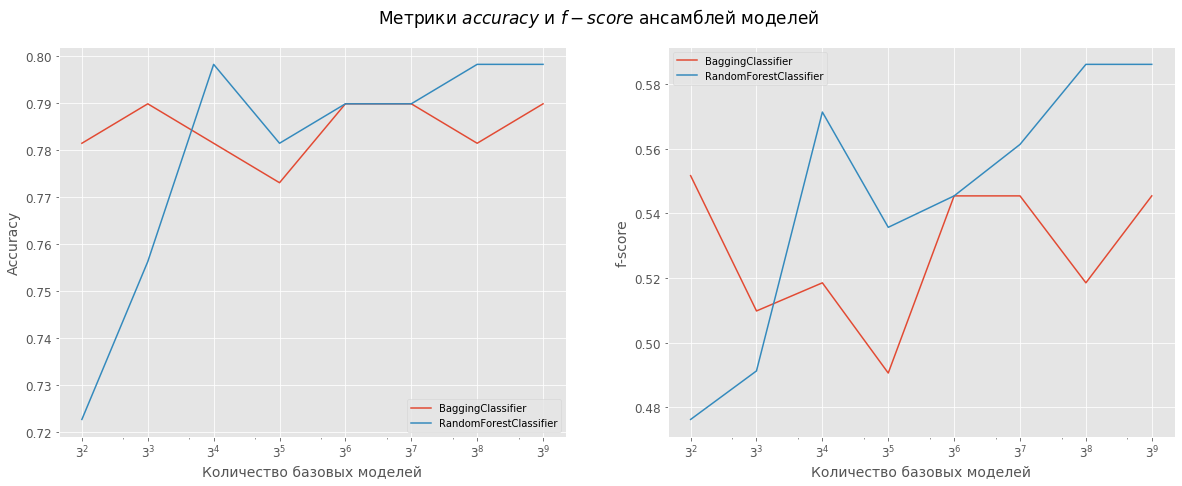

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
plt.suptitle('Метрики $accuracy$ и $f-score$ ансамблей моделей', size=17)


sns.lineplot(n_es, bag_ac, label = 'BaggingClassifier', ax = ax[0])
sns.lineplot(n_es, for_ac, label = 'RandomForestClassifier', ax = ax[0])

sns.lineplot(n_es, bag_f, label = 'BaggingClassifier', ax = ax[1])
sns.lineplot(n_es, for_f, label = 'RandomForestClassifier', ax = ax[1])

ax[0].set_xlabel('Количество базовых моделей')
ax[1].set_xlabel('Количество базовых моделей')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('f-score')

ax[0].set_xscale("log", basex = 3)
ax[1].set_xscale("log", basex = 3)
fig.subplots_adjust(top=0.9)
plt.show()

Похоже, это предположение действительно имеет смысл. Чтобы случайный лес превзошел бэггинг, необходимо увеличить количество базовых моделей.

**4. (2 балл)** Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров:
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

Для удобства создадим датасет со значениями AUC-ROC при различных `n_estimators` (от 10 до 1500 с шагом 90) и `min_samples_leaf` (от 1 до 30 с шагом 5).

In [24]:
np.random.seed(100500)
data_forest = []

for i in np.arange(10, 1500, 90):
    for j in np.arange(1, 30, 5):

        forest = RandomForestClassifier(n_estimators = i, min_samples_leaf = j)
        forest.fit(X_train, y_train)
        for_predict = forest.predict(X_test)
        for_auc_roc = accuracy_score(y_test, for_predict)

        data_forest.append(np.array([i, j, for_auc_roc]))

data_forest = np.array(data_forest)
data_forest = pd.DataFrame(data_forest, columns = ['n_estimators', 'min_samples_leaf', 'AUC-ROC'])

Строим графики:

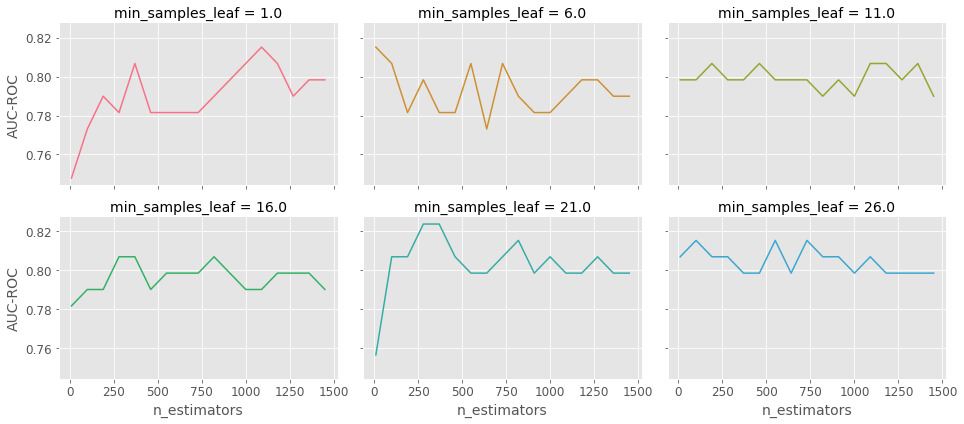

In [25]:
g = sns.FacetGrid(data_forest, col = "min_samples_leaf", col_wrap = 3, hue = 'min_samples_leaf', palette = sns.color_palette("husl", 8), aspect = 1.5, height = 3)
g = g.map(plt.plot, "n_estimators", "AUC-ROC")

Заметно, что улучшение качества ансамбля наблюдается только при `min_samples_leaf` = 1, что логично, поскольку в этом случае в ансамбль входят глубокие переобученные деревья, композиция которых эффективно снижает разброс и приводит к повышению AUC-ROC. При других значениях `min_samples_leaf` базовые алгоритмы, видимо, достаточно хороши сами по себе.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим атрибутом случайного леса в библиотеке `sklearn`, чтобы построить `barplot`.

Обучим случайный лес:

In [18]:
forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, random_state = 1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

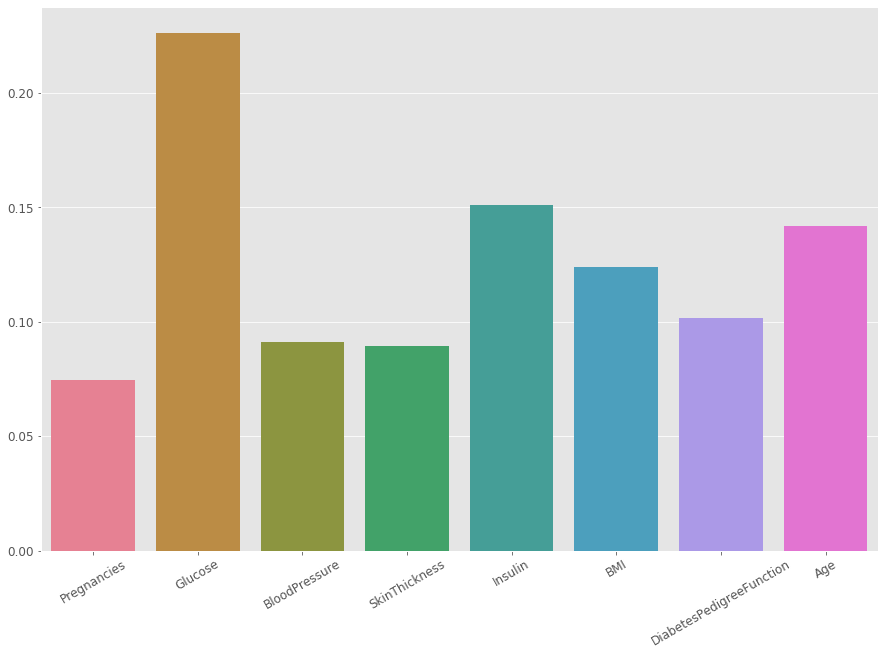

In [27]:
fig = plt.figure(figsize = (15, 10))

g = sns.barplot(data.columns[:8], forest.feature_importances_, palette = sns.color_palette("husl", 8))
plt.setp(g.get_xticklabels(), rotation=30)

plt.show()

Самыми важными признаками оказались `Glucose`, `Insulin` и `Age`. Это можно было понять по виду построенных выше гистограмм в зависимости от диагноза: именно у этих признаков отличие распределений для разных значений `Outcome` *наибольшее*.

**6. (2 балла)** Обучите `HistGradientBoostingClassifier` и `GradientBoostingClassifier` из `sklearn`. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

Как указано в [документации sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html), `HistGradientBoostingClassifier` вдохновлен алгоритмом **LightGBM** от Microsoft. Информация об особенностях этого алгоритма взята с [гитхаба](https://github.com/microsoft/LightGBM/blob/master/docs/Features.rst).


Особенности LightGBM (и, следовательно, HistGradientBoostingClassifier) можно сформулировать в нескольких пунктах:

- **Увеличенная скорость работы и оптимизированное использование памяти.** В отличие от таких алгоритмов, как XGBoost, которые основываются на предварительной сортировке данных, LightGBM использует разбиение признаков на дискретные промежутки (bins). Это снижает расход памяти (вместо вещественных признаков --- интервальные) и повышает скорость работы (легче считать качество разбиения в вершинах дерева).
- **Построение дерева по листочку, а не по веточке :)** (Leaf-wise (Best-first) Tree Growth вместо  Level (Depth)-wise Tree Growth). Признаки для разбиения отбираются не по уровню дерева в целом, а по отдельным вершинам. Это увеличивает риск переобучения в случае маленького количества данных, но зато снижает ошибки.
![Level-wise](https://github.com/microsoft/LightGBM/blob/master/docs/_static/images/level-wise.png?raw=true)

![Leaf-wise](https://github.com/microsoft/LightGBM/blob/master/docs/_static/images/leaf-wise.png?raw=true)
- **Улучшенная работа с категориальными признаками**. LightGBM умеет работать с категориальными признаками и не требует их дополнительной обработки, такой как one-hot encoding. Это достигается за счет деления наблюдений на $k$ категорий ($k$ подбирается алгоритмом исходя из потребностей дерева в каждой вершине).

Оригинальный LightGBM также умеет распараллеливать процессы и использовать GPU-ускорение. Алгоритм sklearn этого не умеет.
___

Чтобы подобрать подходящее количество деревьев, построим график качества `GradientBoostingClassifier` на обучающей и тестовой выборках.

In [80]:
np.random.seed(100500)

train_ac = []
test_ac = []

n_es = 2 ** np.arange(1, 10)

for i in n_es: 
    gb = GradientBoostingClassifier(n_estimators = i, random_state = 1)

    gb.fit(X_train, y_train)

    predict_train = gb.predict(X_train)
    predict_test = gb.predict(X_test)

    train_ac.append(accuracy_score(y_train, predict_train))
    test_ac.append(accuracy_score(y_test, predict_test))

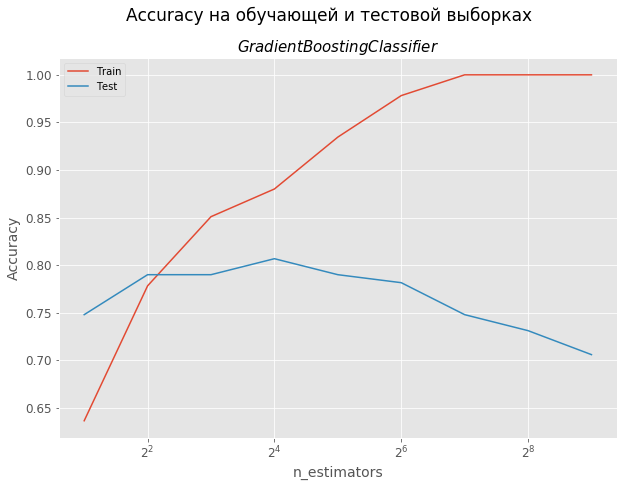

In [81]:
fig = plt.figure(figsize = (10, 7))
plt.suptitle('Accuracy на обучающей и тестовой выборках', size = 17)
plt.title('$GradientBoostingClassifier$', size = 15)


sns.lineplot(n_es, train_ac, label = 'Train').set_xscale("log", basex = 2)
sns.lineplot(n_es, test_ac, label = 'Test').set_xscale("log", basex = 2)

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

plt.show()





Где-то в районе $2^4$ базовых моделей качество на тестовой выборке начинает снижаться, что свидетельствует о переобучении. Поэтому параметр `n_estimators` для `GradientBoostingClassifier` установим на этом уровне.

В `HistGradientBoostingClassifier` не предусмотрена возможность изменения количества базовых моделей. Вместо этого определим оптимальный `learning_rate`.

In [88]:
np.random.seed(100500)

train_ac = []
test_ac = []

lr = np.arange(0.01, 2, 0.1)

for i in lr: 
    hist_gb = HistGradientBoostingClassifier(learning_rate = i, random_state = 1)

    hist_gb.fit(X_train, y_train)

    predict_train = hist_gb.predict(X_train)
    predict_test = hist_gb.predict(X_test)

    train_ac.append(accuracy_score(y_train, predict_train))
    test_ac.append(accuracy_score(y_test, predict_test))

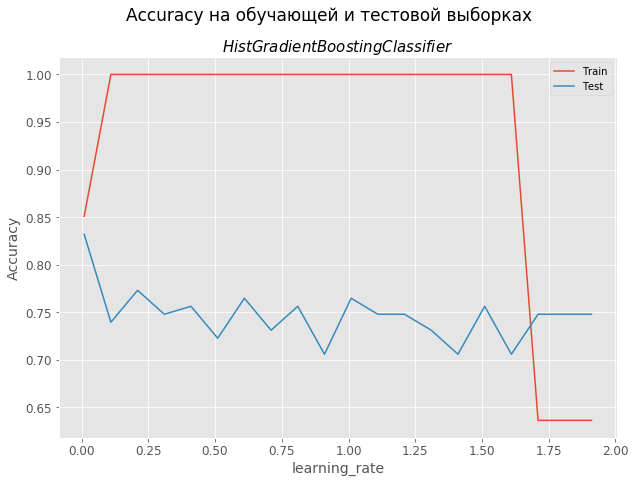

In [89]:
fig = plt.figure(figsize = (10, 7))
plt.suptitle('Accuracy на обучающей и тестовой выборках', size = 17)
plt.title('$HistGradientBoostingClassifier$', size = 15)


sns.lineplot(lr, train_ac, label = 'Train')
sns.lineplot(lr, test_ac, label = 'Test')

plt.xlabel('learning_rate')
plt.ylabel('Accuracy')

plt.show()

Установим `learning_rate` на уровне 1.

Теперь можем сравнить качество данных алгоритмов.

In [92]:
gb = GradientBoostingClassifier(n_estimators = 2 ** 4, random_state = 1)
hist_gb = HistGradientBoostingClassifier(learning_rate = 1, random_state = 1)

gb.fit(X_train, y_train)
hist_gb.fit(X_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=1, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [93]:
print('Качество GradientBoostingClassifier: \n\n', classification_report(y_test, gb.predict(X_test), digits = 3), '\n')
print('Качество HistGradientBoostingClassifier: \n\n', classification_report(y_test, hist_gb.predict(X_test), digits = 3))

Качество GradientBoostingClassifier: 

               precision    recall  f1-score   support

           0      0.837     0.921     0.877        89
           1      0.667     0.467     0.549        30

    accuracy                          0.807       119
   macro avg      0.752     0.694     0.713       119
weighted avg      0.794     0.807     0.794       119
 

Качество HistGradientBoostingClassifier: 

               precision    recall  f1-score   support

           0      0.854     0.854     0.854        89
           1      0.567     0.567     0.567        30

    accuracy                          0.782       119
   macro avg      0.710     0.710     0.710       119
weighted avg      0.782     0.782     0.782       119



Интересно посмотреть, как на той же выборке проявит себя оригинальный LightGBM из пакета `lightgbm`.

In [95]:
import lightgbm as lgb

In [104]:
lgb_class = lgb.LGBMClassifier(learning_rate = 1, random_state = 1)
lgb_class.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [105]:
print('Качество LightGBM: \n\n', classification_report(y_test, lgb_class.predict(X_test), digits = 3))

Качество LightGBM: 

               precision    recall  f1-score   support

           0      0.857     0.809     0.832        89
           1      0.514     0.600     0.554        30

    accuracy                          0.756       119
   macro avg      0.686     0.704     0.693       119
weighted avg      0.771     0.756     0.762       119



Результат этой модели чуть хуже, чем у предыдущих. Возможно, сказывается отсутствие качественного подбора параметров.

**7. (1.5 балла)** Вспомните, что представляет из себя стэкинг моделей. Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классификатор из уже вами изученных на курсе. В качестве мета-классификатора (модели, обученной на ответах) используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

В данном пункте вы можете как написать код для стекинга сами, так и использовать [`StackingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier).

In [106]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

В качестве базовых моделей выберем `GradientBoostingClassifier` (он показал себя лучше всех рассмотренных ансамблей) и `DecisionTreeClassifier` с дефолтными параметрами.

In [109]:
estimators = [('gb', GradientBoostingClassifier(n_estimators = 2 ** 4, random_state = 1)),
('dt', DecisionTreeClassifier(random_state = 1))]

stack = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
stack.fit(X_train, y_train)


StackingClassifier(cv=None,
                   estimators=[('gb',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_s

In [110]:
print('Качество StackingClassifier: \n\n', classification_report(y_test, stack.predict(X_test), digits = 3))

Качество StackingClassifier: 

               precision    recall  f1-score   support

           0      0.839     0.876     0.857        89
           1      0.577     0.500     0.536        30

    accuracy                          0.782       119
   macro avg      0.708     0.688     0.696       119
weighted avg      0.773     0.782     0.776       119



Применение стэкинга к одной сложной и одной простой модели привело к ухудшению качества итоговой композиции. Скорее всего, `DecisionTree` портит предсказательную способность модели, предлагая менее точные оценки классов.

Можно попробовать применить стэкинг к двум сильным моделям: градиентному бустингу и случайному лесу с предварительно отобранными параметрами (см. выше):

In [115]:
estimators = [('gb', GradientBoostingClassifier(n_estimators = 2 ** 4, random_state = 1)),
('rf', RandomForestClassifier(n_estimators = 3  ** 4))]

stack = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
stack.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('gb',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_s

In [116]:
print('Качество StackingClassifier: \n\n', classification_report(y_test, stack.predict(X_test), digits = 3))

Качество StackingClassifier: 

               precision    recall  f1-score   support

           0      0.833     0.899     0.865        89
           1      0.609     0.467     0.528        30

    accuracy                          0.790       119
   macro avg      0.721     0.683     0.697       119
weighted avg      0.777     0.790     0.780       119



Напомню, что `GradientBoostingClassifier` выдал *accuracy*=0.756 и *f-score*=0.877. Таким образом, стэкинг сильных моделей незначительно увеличил *accuracy* и незначительно уменьшил *f-score*, что приводит к выводу, что нет особого смысла применять стэкинг к и так достаточно сильным моделям.

In [13]:
#░░░░░░░░░░░░░░░░░░░░░▄▀░░▌
#░░░░░░░░░░░░░░░░░░░▄▀▐░░░▌
#░░░░░░░░░░░░░░░░▄▀▀▒▐▒░░░▌
#░░░░░▄▀▀▄░░░▄▄▀▀▒▒▒▒▌▒▒░░▌
#░░░░▐▒░░░▀▄▀▒▒▒▒▒▒▒▒▒▒▒▒▒█    -- Ура.
#░░░░▌▒░░░░▒▀▄▒▒▒▒▒▒▒▒▒▒▒▒▒▀▄
#░░░░▐▒░░░░░▒▒▒▒▒▒▒▒▒▌▒▐▒▒▒▒▒▀▄
#░░░░▌▀▄░░▒▒▒▒▒▒▒▒▐▒▒▒▌▒▌▒▄▄▒▒▐
#░░░▌▌▒▒▀▒▒▒▒▒▒▒▒▒▒▐▒▒▒▒▒█▄█▌▒▒▌
#░▄▀▒▐▒▒▒▒▒▒▒▒▒▒▒▄▀█▌▒▒▒▒▒▀▀▒▒▐░░░▄
#▀▒▒▒▒▌▒▒▒▒▒▒▒▄▒▐███▌▄▒▒▒▒▒▒▒▄▀▀▀▀
#▒▒▒▒▒▐▒▒▒▒▒▄▀▒▒▒▀▀▀▒▒▒▒▄█▀░░▒▌▀▀▄▄
#▒▒▒▒▒▒█▒▄▄▀▒▒▒▒▒▒▒▒▒▒▒░░▐▒▀▄▀▄░░░░▀
#▒▒▒▒▒▒▒█▒▒▒▒▒▒▒▒▒▄▒▒▒▒▄▀▒▒▒▌░░▀▄
#▒▒▒▒▒▒▒▒▀▄▒▒▒▒▒▒▒▒▀▀▀▀▒▒▒▄▀